### Machine Learning Assignment: 2
Text classification on 20 newsgroup. The dataset is available in the sklearn library.

In [1]:
from sklearn.datasets import fetch_20newsgroups

In the assignment, we have to use only two categories. 

In [2]:
categories = ['alt.atheism', 'misc.forsale']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer and create a pipeline that attaches it to a multinomial naive Bayes classifier. The "max_features" attribute actually limits how many words the model should learn.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

model = make_pipeline(TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english')), 
                      MultinomialNB())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [4]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

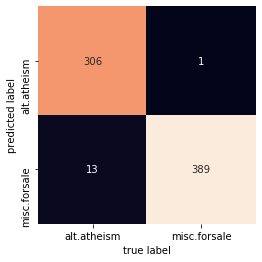

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

Calculating the accuracy achieved on the test data:

In [7]:
no_testData = labels.shape[0]

true = 0
for i in range(no_testData):
    if(labels[i] == test.target[i]):
        true = true + 1

accuracy=true/no_testData
print(accuracy)

0.9802538787023978


Confusion matrix for training data:

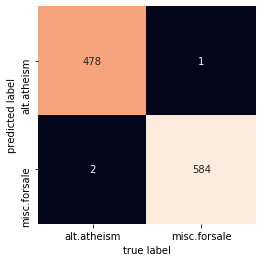

In [8]:
labels = model.predict(train.data)
mat = confusion_matrix(train.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

Calculating accuracy on training data:

In [9]:
import numpy as np

no_trainData = labels.shape[0]

true = 0
for i in range(no_trainData):
    if(labels[i] == train.target[i]):
        true = true + 1

accuracy=true/no_trainData
print(accuracy)

0.9971830985915493


Finding ten words with highest information gain

In [10]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

X, Y = train.data, train.target
cv = CountVectorizer(max_df=0.95, min_df=2, max_features=10, stop_words='english')
X_vec = cv.fit_transform(X)
res = dict(zip(cv.get_feature_names(), mutual_info_classif(X_vec, Y, discrete_features=True)))

print(res)

{'00': 0.04350693015092243, 'article': 0.11246039047530126, 'com': 0.03206842768967533, 'don': 0.07951440901273281, 'edu': 0.03333342824127194, 'god': 0.13174200221790422, 'people': 0.11177375620665533, 'posting': 0.007975323709342633, 'sale': 0.2661014632327929, 'writes': 0.30859269013820606}


## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.